In [1]:
import testing
import numpy as np
import nummericalResources as nr
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import copy

lightColor = "#8bb1cc"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"

plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\ffmpeg.exe'


adding state(s):  [10, 11]
current config:  [10, 11]
recomputing all momentum projection coefficients...
removing state(s):  [10, 11]
current config:  []
adding state(s):  [10, 11]
current config:  [10, 11]


'\nfig = plt.figure()\nax = plt.axes()\nlines = ax.plot(x, np.real(func(x, 0)))\n\ndef init():\n    lines[0].set_data(x, np.abs(func(x, 0))**2)\n    return lines\n\ndef animate(i):\n    lines[0].set_data(x, np.abs(func(x, 0.025*i))**2)\n    return lines\n\nanim = FuncAnimation(fig, animate, init_func=init, frames=800, interval=20, blit=True)\nanim.save("test.gif")\n'

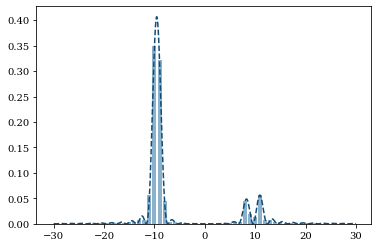

In [2]:
L = np.pi
gamma = -10
l = 1
bound = 15

State3 = testing.Particle_in_Box_State(gamma, L, [10, 11], [1,1], bound, -bound)
#State2 = testing.SystemState(gamma, L, [2, 2], [1, 1], bound, -bound)


State3.bound = 30
State3.gamma = 0.00001
#State3.change_energy_proj_coeff(1, 0.1)
State3.property_change_complete_recompute()

x = np.linspace(-L/2, L/2, 500)
func = State3.pos_space_wavefunc

distr = State3._momentum_prob_distr_cont
distrDisc = State3._momentum_prob_distr_disc



fig = plt.figure()
pDistrPlot = plt.axes()

pDistrPlot.bar(State3.momentum_kn, distrDisc, color=lightColor)
pDistrPlot.plot(State3.momentum_k, distr, color=darkColor, ls="--")


np.sum(np.abs(State3._energy_proj_coeff)**2)

'''
fig = plt.figure()
ax = plt.axes()
lines = ax.plot(x, np.real(func(x, 0)))

def init():
    lines[0].set_data(x, np.abs(func(x, 0))**2)
    return lines

def animate(i):
    lines[0].set_data(x, np.abs(func(x, 0.025*i))**2)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=800, interval=20, blit=True)
anim.save("test.gif")
'''

In [ ]:
# Testing momentum distribution (general case with gamma_+ = gamm_- =: gamma)
L = np.pi
gamma = 100
l = 5
bound = 15
cStep = 0.01
dStep = 1
x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound+cStep, cStep)*np.pi/L
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L
# Computing all kl values corresponding to gamma
allKl = nr.gamma_to_k(gamma, l, L)
# Computing the continuous momentum prob. density (old concept)
distr = nr.P_momentumContinuous(k, allKl, l, L)
# Computing the discrete monmentum prob. dirst. (new concept)
distrDisc = nr.getP_momentumDiscrete(kn, allKl, l, L)

fig = plt.figure()
pDistrPlot = plt.axes()

pDistrPlot.plot(k, distr[0], c=darkColor, ls="--",label=r"Probalbility Density $\left\vert \langle k \vert l \rangle \right\vert^2$")
pDistrPlot.bar(kn, distrDisc[0], color=lightColor,label=r"Probability Distribution $\left\vert \langle n \vert l \rangle \right\vert^2$")
pDistrPlot.set_xlabel("$k$")
pDistrPlot.set_ylabel("Probability Distribution / Density")
pDistrPlot.legend(loc="upper left")
pDistrPlot.grid(True, which="major", axis="y", lw=0.5, c="0.8")

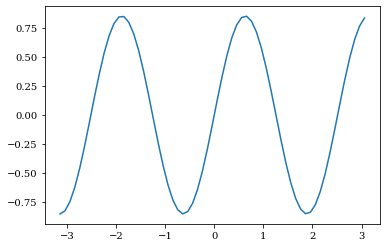

In [15]:
firstFunc = testing.Function_of_x_and_t(lambda x,t: testing.psi_l_Pos_even(np.pi, 2.5, x))
#secondFunc = firstFunc + firstFunc
x = np.arange(-np.pi, np.pi, 0.1)


thirdFunc = testing.Function_of_x_and_t(lambda x, t: 0)
thirdFunc = thirdFunc + firstFunc


plt.plot(x, thirdFunc(x, 0))

In [24]:
import copy

class C:
    def __init__(self, arr):
        self.alist = np.array(arr)
    
    def test(self):
        acopy = self.alist
        self.alist = None
        self.alist = acopy

c = C([1,2,3,4])
c.test()
c.alist

[1, 2, 3, 4]

In [8]:
class A:
    def __init__(self, a):
        self.a = a

class B:
    def __init__(self, A: A):
        self.A = A
    
    def BPrint(self):
        print(self.A.a)

a = A(1)
b = B(a)
b.BPrint()
a.a = 2
b.BPrint()

1
2


In [6]:
startarr = np.array([1,2,3,4,5,6,7,8])
textArr = np.array(["one", "two", "three", "four", "five", "six", "seven", "eight"])


np.delete(textArr, [0, 1, 2, 3])



array(['five', 'six', 'seven', 'eight'], dtype='<U5')